[['54-50' '0' '1']
 ['49-45' '-6' '1']
 ['44-40' '-6' '3']
 ['39-35' '-11' '8']
 ['34-30' '-16' '15']
 ['29-25' '-33' '26']
 ['24-20' '-28' '21']
 ['19-15' '-4' '1']]


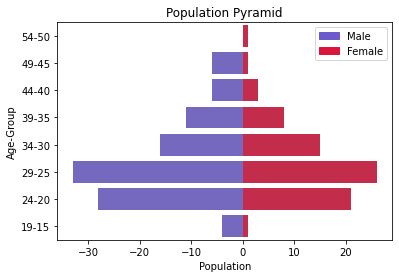

In [5]:
'''
Import packages
'''
#Preprocess
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Array package
import numpy as np


'''
Subfunctions
'''
def Set_AgeGroups(Data,Age_Range):
    Age_groups = [0,0,0,0,0,0,0,0]

    Set_Index = 0
    Age_Flag = Data[0][0]//5
    for temp in Data:
        if temp[0]//Age_Range != Age_Flag:
            Set_Index+=1
            Age_Flag = temp[0]//Age_Range

        Age_groups[Set_Index] += temp[1]
    
    Age_groups = Age_groups[::-1]
    return Age_groups


'''
Read raw data sets
'''

addr = "https://raw.githubusercontent.com/CHENG-WEI-HSUEH/Kaggle/main/CardioGoodFitness.csv"

raw_data = pd.read_csv(addr)

#Test - show 5 data to check read in successfully
#print(raw_data.head(5))

'''
Preprocess

1. Get the shape of data - (180,9)
2. How many attributions in the data - 9 types: Product, Age, Gender...
3. Are there any missing data in the file - No
    3-1. If there are some missing data, put NULL/0 the column 
'''

#Get the shape of data
rawdata_shape = raw_data.shape

#Get the shape of data (r180,c9)
#print(rawdata_shape)

#Get detailed info from the data
#rawdata_info = raw_data.info()


'''
Preprocess - set age groups by gender
'''

#Classify customer by gender
Data_M = raw_data.groupby(['Gender']).get_group('Male')
Data_F = raw_data.groupby(['Gender']).get_group('Female')

#Show the results
#print(Data_M.head())
#print(Data_F.head())


#Set the population by age groups
(unique_M, counts_M) = np.unique(Data_M["Age"], return_counts=True)
counts_M[counts_M>0] *= -1    #being negative to show left side of population of pyramid
Age_data_M = np.asarray((unique_M, counts_M)).T
#print(Age_data_M)


(unique_F, counts_F) = np.unique(Data_F["Age"], return_counts=True)
Age_data_F = np.asarray((unique_F, counts_F)).T
#print(Age_data_F)


Age_labels = ['54-50','49-45','44-40','39-35','34-30','29-25','24-20','19-15']
Age_Groups = np.asarray((Age_labels, Set_AgeGroups(Age_data_M,5), Set_AgeGroups(Age_data_F,5))).T
df = pd.DataFrame(Age_Groups, columns = ['Age','Male','Female'])

'''
Visualize raw data

1. show the population pyramid of customers
'''
colors = {'Male':'slateblue', 'Female':'crimson'}    
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

bar_plot = sns.barplot(x='Male', y='Age', color="slateblue", data=df, order=Age_labels)
bar_plot = sns.barplot(x='Female', y='Age', color="crimson", data=df, order=Age_labels)
bar_plot.set(xlabel="Population", ylabel="Age-Group", title = "Population Pyramid")
print(Age_Groups)